# <font color='blue'>Data Science Academy</font>
# <font color='blue'>Deep Learning I</font>

## Mini-Projeto 6

Neste Mini-Projeto, demonstramos a aplicação de Modelos de aprendizado de máquina e algumas métricas básicas de avaliação de modelo para executar tarefas de classificação com o Chicago Crime Dataset.

Um Modelo Ensemble é um modelo composto de vários outros modelos, cada qual fazendo suas próprias previsões. Ao final, ocorre uma votação para então definir a previsão final do modelo ensemble.

Criamos o Modelo Ensemble com 3 modelos: KNN, RandomForest e Neural Network. Vamos criar um modelo de classificação para prever os crimes na cidade de Chicago.

O dataset usado é público e pode ser encontrado aqui: 

https://data.cityofchicago.org/Public-Safety/Crimes-2019/w98m-zvie

Os datasets totalizam 2 GB e estão disponíveis no Titan.

In [1]:
# Para atualizar um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install -U nome_pacote

# Para instalar a versão exata de um pacote, execute o comando abaixo no terminal ou prompt de comando:
# pip install nome_pacote==versão_desejada

# Depois de instalar ou atualizar o pacote, reinicie o jupyter notebook.

In [2]:
# Instala o pacote watermark. 
# Esse pacote é usado para gravar as versões de outros pacotes usados neste jupyter notebook.
!pip install -q -U watermark

In [3]:
!pip install -q yellowbrick

In [4]:
# Imports
import sys
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings("ignore", category=FutureWarning)
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Gráficos
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

# Manipulação de dados
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report

# Machine Learning
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

# Métricas de avaliação
from yellowbrick.classifier import ClassificationReport
from sklearn import metrics
import sklearn

In [5]:
# Versões dos pacotes usados neste jupyter notebook
%reload_ext watermark
%watermark -a "Data Science Academy" --iversions

sklearn    0.22.2
matplotlib 3.2.1
seaborn    0.9.0
pandas     1.0.3
Data Science Academy


### Carregando os Dados

In [6]:
# Carregando e concatenando os dados

# Para executar no Titan, descomente as linhas abaixo
# df = pd.concat([pd.read_csv('/media/datasets/DeepLearningI/Cap06/Mini-Projeto6/data/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False), 
#                pd.read_csv('/media/datasets/DeepLearningI/Cap06/Mini-Projeto6/data/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)], ignore_index=True)

# df = pd.concat([df, pd.read_csv('/media/datasets/DeepLearningI/Cap06/Mini-Projeto6/data/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)], ignore_index=True)

# df = pd.concat([df, pd.read_csv('/media/datasets/DeepLearningI/Cap06/Mini-Projeto6/data/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)], ignore_index=True)

# Para executar localmente no seu computador (se for executar no Titan, comente as linhas abaixo)
df = pd.concat([pd.read_csv('data/Chicago_Crimes_2001_to_2004.csv', error_bad_lines=False), 
                pd.read_csv('data/Chicago_Crimes_2005_to_2007.csv', error_bad_lines=False)], ignore_index=True)

df = pd.concat([df, pd.read_csv('data/Chicago_Crimes_2008_to_2011.csv', error_bad_lines=False)], ignore_index=True)

df = pd.concat([df, pd.read_csv('data/Chicago_Crimes_2012_to_2017.csv', error_bad_lines=False)], ignore_index=True)

df.head()

b'Skipping line 1513591: expected 23 fields, saw 24\n'
b'Skipping line 533719: expected 23 fields, saw 24\n'
b'Skipping line 1149094: expected 23 fields, saw 41\n'


,Unnamed: 0,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,879,4786321,HM399414,01/01/2004 12:01:00 AM,082XX S COLES AVE,0840,THEFT,FINANCIAL ID THEFT: OVER $300,RESIDENCE,False,...,7.0,46.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
1,2544,4676906,HM278933,03/01/2003 12:00:00 AM,004XX W 42ND PL,2825,OTHER OFFENSE,HARASSMENT BY TELEPHONE,RESIDENCE,False,...,11.0,61.0,26,1173974.0,1.87676e+06,2003.0,04/15/2016 08:55:02 AM,41.8172,-87.637328,"(41.817229156, -87.637328162)"
2,2919,4789749,HM402220,06/20/2004 11:00:00 AM,025XX N KIMBALL AVE,1752,OFFENSE INVOLVING CHILDREN,AGG CRIM SEX ABUSE FAM MEMBER,RESIDENCE,False,...,35.0,22.0,20,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
3,2927,4789765,HM402058,12/30/2004 08:00:00 PM,045XX W MONTANA ST,0840,THEFT,FINANCIAL ID THEFT: OVER $300,OTHER,False,...,31.0,20.0,06,NaN,NaN,2004.0,08/17/2015 03:03:40 PM,NaN,NaN,NaN
4,3302,4677901,HM275615,05/01/2003 01:00:00 AM,111XX S NORMAL AVE,0841,THEFT,FINANCIAL ID THEFT:$300 &UNDER,RESIDENCE,False,...,34.0,49.0,06,1174948.0,1.83105e+06,2003.0,04/15/2016 08:55:02 AM,41.6918,-87.635116,"(41.691784636, -87.635115968)"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7941282 entries, 0 to 7941281
Data columns (total 23 columns):
 #   Column                Dtype  
---  ------                -----  
 0   Unnamed: 0            int64  
 1   ID                    int64  
 2   Case Number           object 
 3   Date                  object 
 4   Block                 object 
 5   IUCR                  object 
 6   Primary Type          object 
 7   Description           object 
 8   Location Description  object 
 9   Arrest                bool   
 10  Domestic              bool   
 11  Beat                  int64  
 12  District              float64
 13  Ward                  float64
 14  Community Area        float64
 15  FBI Code              object 
 16  X Coordinate          float64
 17  Y Coordinate          object 
 18  Year                  float64
 19  Updated On            object 
 20  Latitude              object 
 21  Longitude             float64
 22  Location              object 
dtypes: bool

### Data Wrangling

In [8]:
# Removendo valores missing
df = df.dropna()

In [9]:
# Como o conjunto de dados é muito grande vamos trabalhar com uma amostra para modelagem como prova de conceito
df = df.sample(n=10000)

In [10]:
# Removendo atributos irrelevantes / sem significado
df = df.drop(['Unnamed: 0'], axis=1)
df = df.drop(['ID'], axis=1)
df = df.drop(['Case Number'], axis=1) 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 4179932 to 3342176
Data columns (total 20 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  10000 non-null  object 
 1   Block                 10000 non-null  object 
 2   IUCR                  10000 non-null  object 
 3   Primary Type          10000 non-null  object 
 4   Description           10000 non-null  object 
 5   Location Description  10000 non-null  object 
 6   Arrest                10000 non-null  bool   
 7   Domestic              10000 non-null  bool   
 8   Beat                  10000 non-null  int64  
 9   District              10000 non-null  float64
 10  Ward                  10000 non-null  float64
 11  Community Area        10000 non-null  float64
 12  FBI Code              10000 non-null  object 
 13  X Coordinate          10000 non-null  float64
 14  Y Coordinate          10000 non-null  object 
 15  Year       

In [11]:
# Dividindo a coluna Date em Day, Month, Year, Hour, Minute, Second
df['date2'] = pd.to_datetime(df['Date'])
df['Year'] = df['date2'].dt.year
df['Month'] = df['date2'].dt.month
df['Day'] = df['date2'].dt.day
df['Hour'] = df['date2'].dt.hour
df['Minute'] = df['date2'].dt.minute
df['Second'] = df['date2'].dt.second 
df = df.drop(['Date'], axis=1) 
df = df.drop(['date2'], axis=1) 
df = df.drop(['Updated On'], axis=1)
df.head()

,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,Beat,District,Ward,...,Y Coordinate,Year,Latitude,Longitude,Location,Month,Day,Hour,Minute,Second
4179932,009XX N FRANKLIN ST,0810,THEFT,OVER $500,STREET,False,False,1823,18.0,27.0,...,1.90664e+06,2008,41.8992,-87.635785,"(41.899220837, -87.635784696)",11,15,12,0,0
6957193,033XX W VAN BUREN ST,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1134,11.0,28.0,...,1.89783e+06,2013,41.8755,-87.709002,"(41.875473696, -87.709002168)",3,24,14,52,0
7229135,0000X E CULLERTON ST,1320,CRIMINAL DAMAGE,TO VEHICLE,STREET,False,False,131,1.0,3.0,...,1.89072e+06,2014,41.8555,-87.624756,"(41.855478673, -87.624756315)",2,8,17,0,0
3752565,001XX W JACKSON BLVD,0890,THEFT,FROM BUILDING,COMMERCIAL / BUSINESS OFFICE,False,False,112,1.0,2.0,...,1.89896e+06,2006,41.8781,-87.633209,"(41.878123916, -87.633208786)",2,13,10,0,0
2768729,050XX W WEST END AVE,0486,BATTERY,DOMESTIC BATTERY SIMPLE,APARTMENT,False,True,1532,15.0,28.0,...,1.90051e+06,2006,41.8831,-87.751057,"(41.883057444, -87.751056566)",12,16,9,30,0


In [12]:
# Convertendo atributos categóricos em numéricos
df['Block'] = pd.factorize(df["Block"])[0]
df['IUCR'] = pd.factorize(df["IUCR"])[0]
df['Description'] = pd.factorize(df["Description"])[0]
df['Location Description'] = pd.factorize(df["Location Description"])[0]
df['FBI Code'] = pd.factorize(df["FBI Code"])[0]
df['Location'] = pd.factorize(df["Location"])[0] 

In [13]:
# Variável target
Target = 'Primary Type'
print('Target: ', Target)

Target:  Primary Type


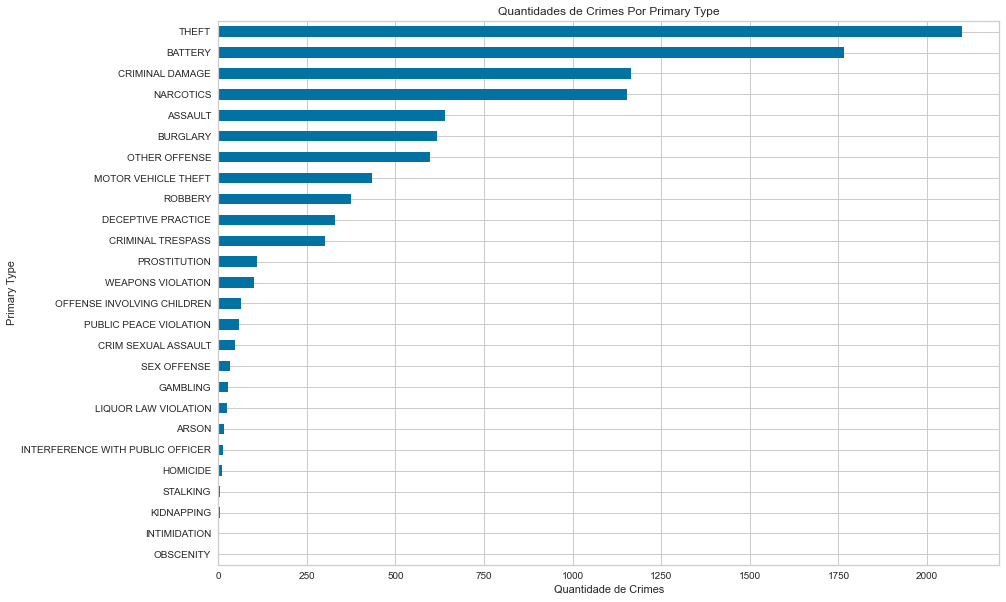

In [14]:
# Plot
plt.figure(figsize=(14,10))
plt.title('Quantidades de Crimes Por Primary Type')
plt.ylabel('Tipo de Crime')
plt.xlabel('Quantidade de Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [15]:
# No plot anterior, pudemos ver que as classes estão bastante desequilibradas
# Portanto, vamos agrupar vários tipos de crimes com menos ocorrências em 'Outros' para reduzir o valor da Classe Alvo

# Primeiro, resumimos a quantidade de Crime Type ocorrida e selecionamos as últimas 13 classes
all_classes = df.groupby(['Primary Type'])['Block'].size().reset_index()
all_classes['Amt'] = all_classes['Block']
all_classes = all_classes.drop(['Block'], axis=1)
all_classes = all_classes.sort_values(['Amt'], ascending=[False])

unwanted_classes = all_classes.tail(13)
unwanted_classes

,Primary Type,Amt
17,OFFENSE INVOLVING CHILDREN,63
20,PUBLIC PEACE VIOLATION,60
4,CRIM SEXUAL ASSAULT,46
22,SEX OFFENSE,34
8,GAMBLING,27
13,LIQUOR LAW VIOLATION,25
0,ARSON,16
10,INTERFERENCE WITH PUBLIC OFFICER,14
9,HOMICIDE,11
12,KIDNAPPING,6


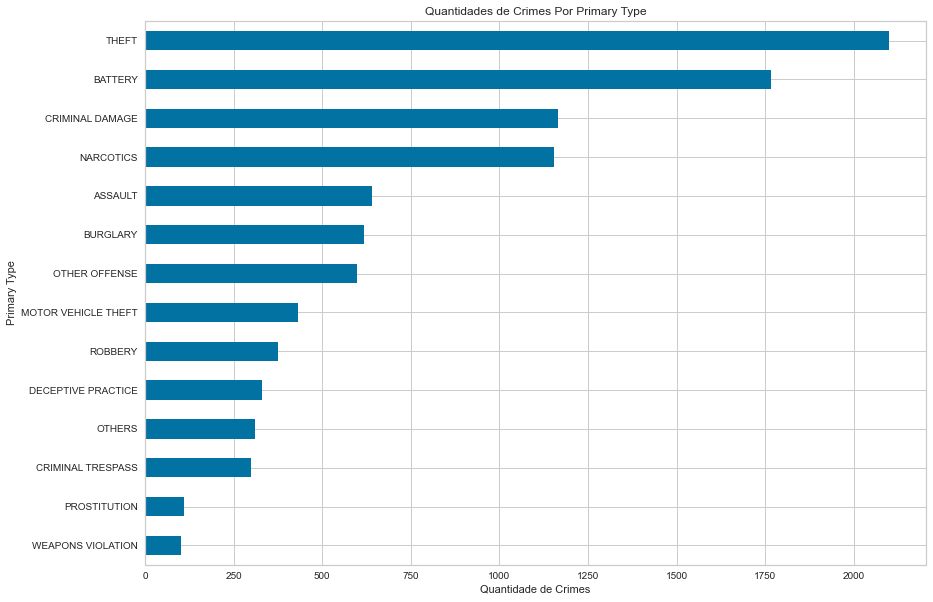

In [16]:
# Depois disso, substituímos pelo rótulo 'OUTROS'
df.loc[df['Primary Type'].isin(unwanted_classes['Primary Type']), 'Primary Type'] = 'OTHERS'

# Plot Bar 
plt.figure(figsize=(14,10))
plt.title('Quantidades de Crimes Por Primary Type')
plt.ylabel('Tipo de Crime')
plt.xlabel('Quantidade de Crimes')

df.groupby([df['Primary Type']]).size().sort_values(ascending=True).plot(kind='barh')

plt.show()

In [17]:
# Agora ficamos com 14 Class 
Classes = df['Primary Type'].unique()
Classes

array(['THEFT', 'BATTERY', 'CRIMINAL DAMAGE', 'DECEPTIVE PRACTICE',
       'BURGLARY', 'OTHER OFFENSE', 'CRIMINAL TRESPASS', 'NARCOTICS',
       'ASSAULT', 'ROBBERY', 'MOTOR VEHICLE THEFT', 'OTHERS',
       'PROSTITUTION', 'WEAPONS VIOLATION'], dtype=object)

In [18]:
# Encoding dos rótulos de destino em variáveis categóricas:
df['Primary Type'] = pd.factorize(df["Primary Type"])[0] 
df['Primary Type'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13])

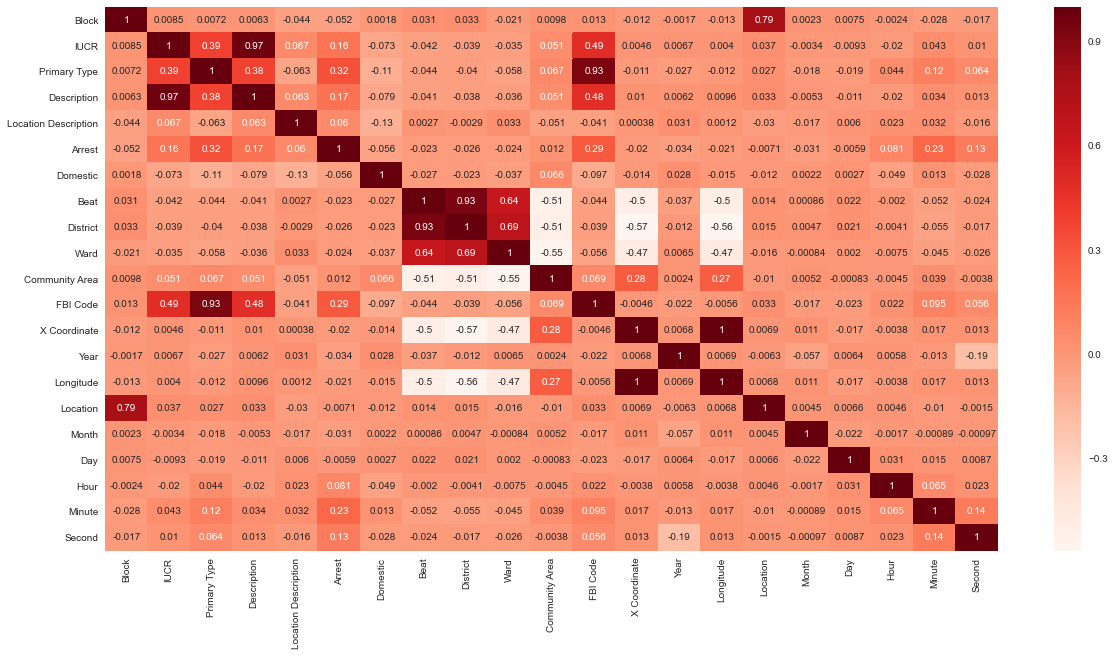

In [19]:
# Seleção de recursos usando o método de filtro
# Dividir Dataframe para direcionar classe e recursos
X_fs = df.drop(['Primary Type'], axis=1)
Y_fs = df['Primary Type']

# Usando Correlação Pearson 
plt.figure(figsize=(20,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

O coeficiente de correlação possui valores entre -1 e 1

* Um valor mais próximo de 0 implica correlação mais fraca (0 exato não implica correlação)
* Um valor próximo de 1 implica correlação positiva mais forte
* Um valor mais próximo de -1 implica correlação negativa mais forte

In [20]:
# Correlação com a variável de saída
cor_target = abs(cor['Primary Type'])

# Selecionando recursos altamente correlacionados
relevant_features = cor_target[cor_target > 0.3]
relevant_features

IUCR            0.389488
Primary Type    1.000000
Description     0.382060
Arrest          0.321622
FBI Code        0.930937
Name: Primary Type, dtype: float64

In [21]:
# No ponto atual, os atributos são selecionados manualmente com base na seleção de recursos. 
Features = ["IUCR", "Description", "FBI Code"]
print('Full Features: ', Features)

Full Features:  ['IUCR', 'Description', 'FBI Code']


In [22]:
# Dividindo o conjunto de dados em Conjunto de treinamento e Conjunto de teste
x, y = train_test_split(df, 
                        test_size = 0.2, 
                        train_size = 0.8, 
                        random_state= 3)

x1 = x[Features]    
x2 = x[Target]      
y1 = y[Features]    
y2 = y[Target]      

print('Conjunto de Atributos Usados    : ', Features)
print('Variável Target        : ', Target)
print('Shape do Dataset de Treino   : ', x.shape)
print('Shape do Dataset de Teste       : ', y.shape)

Conjunto de Atributos Usados    :  ['IUCR', 'Description', 'FBI Code']
Variável Target        :  Primary Type
Shape do Dataset de Treino   :  (8000, 23)
Shape do Dataset de Teste       :  (2000, 23)


**Construção do Modelo Preditivo**

In [23]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=70, # Number of trees
                                  min_samples_split = 30,
                                  bootstrap = True, 
                                  max_depth = 50, 
                                  min_samples_leaf = 25)

# Model Training
rf_model.fit(X=x1,
             y=x2)

# Prediction
result = rf_model.predict(y[Features])

In [24]:
# Avaliação do Modelo
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("\n========== Métricas do Modelo Random Forest ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix:\n ")
print(confusion_m)


========== Métricas do Modelo Random Forest ==========
Accuracy    :  0.9735
Recall      :  0.9735
Precision   :  0.9757362275891749
F1 Score    :  0.9735
Confusion Matrix:
 
[[416   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 331   0   8   0   0   0   0   0   0   0   0   0   0]
 [  0   0 232   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  58   0   0   0   0   0   0   0  10   0   0]
 [  0   0   0   2 127   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 123   3   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0  54   0   0   0   0   0   0   0]
 [  0   0   0   0   0   1   0 245   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 119   1   2   2   0   0]
 [  0   0   0   0   0   0   0   0   0  79   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  75   0   0   0]
 [  0   0   0   0   0   6   0   0   3   0   0  59   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   9  17   1]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0  12

================= Relatório de Classificação =================

                     precision    recall  f1-score   support

              THEFT       1.00      1.00      1.00       416
            BATTERY       1.00      0.98      0.99       339
    CRIMINAL DAMAGE       1.00      1.00      1.00       232
 DECEPTIVE PRACTICE       0.85      0.85      0.85        68
           BURGLARY       1.00      0.98      0.99       129
      OTHER OFFENSE       0.95      0.96      0.95       128
  CRIMINAL TRESPASS       0.95      1.00      0.97        54
          NARCOTICS       0.99      1.00      0.99       246
            ASSAULT       0.98      0.96      0.97       124
            ROBBERY       0.99      1.00      0.99        79
MOTOR VEHICLE THEFT       0.97      1.00      0.99        75
             OTHERS       0.71      0.87      0.78        68
       PROSTITUTION       1.00      0.63      0.77        27
  WEAPONS VIOLATION       0.92      0.80      0.86        15

           accuracy

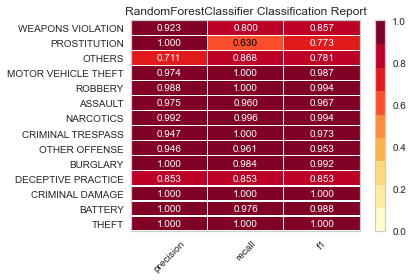

In [25]:
# Relatório de Classificação
target_names = Classes
visualizer = ClassificationReport(rf_model, classes=target_names)
visualizer.fit(X=x1, y=x2)    
visualizer.score(y1, y2)       

print('================= Relatório de Classificação =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             

In [26]:
# Rede Neural
nn_model = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(40,), random_state=1, max_iter=1000)

# Model Training
nn_model.fit(X=x1, y=x2)

# Prediction
result = nn_model.predict(y[Features]) 

In [27]:
# Avaliação do Modelo
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== Neural Network ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: \n")
print(confusion_m)

========== Neural Network ==========
Accuracy    :  0.9345
Recall      :  0.9345
Precision   :  0.9419782125273928
F1 Score    :  0.9345
Confusion Matrix: 

[[416   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 339   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 232   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  42  13   0   0   0   0   0   0  13   0   0]
 [  0   0   0   7 122   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3 123   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0  16  38   0   0   0   0   0   0   0]
 [  0   0   0   0   0  15   0 231   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   5 114   0   3   2   0   0]
 [  0   0   0   0   0   0   0   0   2  73   3   1   0   0]
 [  0   0   0   0   0   0   0   0   0   1  74   0   0   0]
 [  0   0   0   0   0   5   0   0   0   0   0  48   0  15]
 [  0   0   0   0   0   0   0   0   0   0   0  10  17   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15   0   0]]


================= Relatório de Classificação =================

                     precision    recall  f1-score   support

              THEFT       1.00      1.00      1.00       416
            BATTERY       1.00      1.00      1.00       339
    CRIMINAL DAMAGE       1.00      1.00      1.00       232
 DECEPTIVE PRACTICE       0.86      0.62      0.72        68
           BURGLARY       0.88      0.95      0.91       129
      OTHER OFFENSE       0.77      0.96      0.86       128
  CRIMINAL TRESPASS       1.00      0.70      0.83        54
          NARCOTICS       0.97      0.94      0.95       246
            ASSAULT       0.98      0.92      0.95       124
            ROBBERY       0.99      0.92      0.95        79
MOTOR VEHICLE THEFT       0.93      0.99      0.95        75
             OTHERS       0.54      0.71      0.61        68
       PROSTITUTION       1.00      0.63      0.77        27
  WEAPONS VIOLATION       0.00      0.00      0.00        15

           accuracy

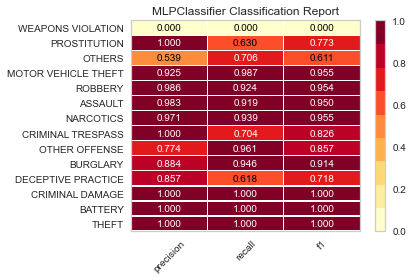

In [28]:
# Relatório de Classificação
target_names = Classes
visualizer = ClassificationReport(nn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     # Fit the training data to the visualizer
visualizer.score(y1, y2)       # Evaluate the model on the test data

print('================= Relatório de Classificação =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()             # Draw/show/poof the data

In [29]:
# KNN
knn_model = KNeighborsClassifier(n_neighbors=3)

# Model Training
knn_model.fit(X=x1, y=x2)

# Prediction
result = knn_model.predict(y[Features]) 

In [30]:
# Model Evaluation
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("========== K-Nearest Neighbors ==========")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: \n")
print(confusion_m)

========== K-Nearest Neighbors ==========
Accuracy    :  0.988
Recall      :  0.988
Precision   :  0.9882354455659251
F1 Score    :  0.988
Confusion Matrix: 

[[414   0   0   2   0   0   0   0   0   0   0   0   0   0]
 [  0 337   0   1   0   1   0   0   0   0   0   0   0   0]
 [  0   0 232   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  68   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0 129   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 125   0   2   0   0   1   0   0   0]
 [  0   0   0   0   0   0  54   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0 242   0   0   0   1   0   0]
 [  0   0   0   0   0   0   0   0 122   1   0   1   0   0]
 [  0   0   0   0   0   1   0   0   0  78   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  75   0   0   0]
 [  0   3   0   0   0   0   0   0   2   0   1  60   0   2]
 [  0   0   0   0   0   0   0   0   0   0   0   0  26   1]
 [  0   0   0   0   0   0   0   0   0   0   1   0   0  14]]


================= Relatório de Classificação =================

                     precision    recall  f1-score   support

              THEFT       1.00      1.00      1.00       416
            BATTERY       0.99      0.99      0.99       339
    CRIMINAL DAMAGE       1.00      1.00      1.00       232
 DECEPTIVE PRACTICE       0.96      1.00      0.98        68
           BURGLARY       1.00      1.00      1.00       129
      OTHER OFFENSE       0.96      0.98      0.97       128
  CRIMINAL TRESPASS       1.00      1.00      1.00        54
          NARCOTICS       0.99      0.98      0.99       246
            ASSAULT       0.98      0.98      0.98       124
            ROBBERY       0.99      0.99      0.99        79
MOTOR VEHICLE THEFT       0.96      1.00      0.98        75
             OTHERS       0.97      0.88      0.92        68
       PROSTITUTION       1.00      0.96      0.98        27
  WEAPONS VIOLATION       0.82      0.93      0.87        15

           accuracy

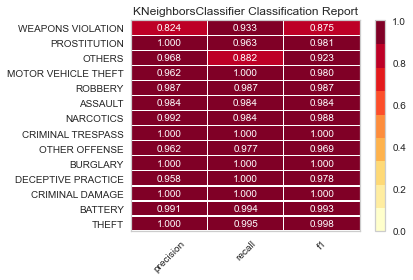

In [31]:
# Relatório de Classificação
target_names = Classes
visualizer = ClassificationReport(knn_model, classes=target_names)
visualizer.fit(X=x1, y=x2)     
visualizer.score(y1, y2)       

print('================= Relatório de Classificação =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()            

In [32]:
# Ensemble Voting Model
# Combinando 3 modelos para criar um modelo Ensemble

# Create Model with configuration
eclf1 = VotingClassifier(estimators=[('knn', knn_model), 
                                     ('rf', rf_model), 
                                     ('nn', nn_model)], 
                         weights=[1,1,1],
                         flatten_transform=True)

eclf1 = eclf1.fit(X=x1, y=x2)   

# Prediction
result = eclf1.predict(y[Features])

In [33]:
# Avaliação do Modelo
ac_sc = accuracy_score(y2, result)
rc_sc = recall_score(y2, result, average="weighted")
pr_sc = precision_score(y2, result, average="weighted")
f1_sc = f1_score(y2, result, average='micro')
confusion_m = confusion_matrix(y2, result)

print("============= Ensemble Voting =============")
print("Accuracy    : ", ac_sc)
print("Recall      : ", rc_sc)
print("Precision   : ", pr_sc)
print("F1 Score    : ", f1_sc)
print("Confusion Matrix: \n")
print(confusion_m)

============= Ensemble Voting =============
Accuracy    :  0.979
Recall      :  0.979
Precision   :  0.9814081519672762
F1 Score    :  0.979
Confusion Matrix: 

[[416   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0 339   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0 232   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0  58   0   0   0   0   0   0   0  10   0   0]
 [  0   0   0   2 127   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   3 123   0   2   0   0   0   0   0   0]
 [  0   0   0   0   0   0  54   0   0   0   0   0   0   0]
 [  0   0   0   0   0   3   0 243   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0 121   1   0   2   0   0]
 [  0   0   0   0   0   0   0   0   0  79   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0  75   0   0   0]
 [  0   1   0   0   0   5   0   0   0   0   0  62   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   9  17   1]
 [  0   0   0   0   0   0   0   0   0   0   0   3   0  12]]


================= Relatório de Classificação =================

                     precision    recall  f1-score   support

              THEFT       1.00      1.00      1.00       416
            BATTERY       1.00      1.00      1.00       339
    CRIMINAL DAMAGE       1.00      1.00      1.00       232
 DECEPTIVE PRACTICE       0.97      0.85      0.91        68
           BURGLARY       0.98      0.98      0.98       129
      OTHER OFFENSE       0.94      0.96      0.95       128
  CRIMINAL TRESPASS       1.00      1.00      1.00        54
          NARCOTICS       0.99      0.99      0.99       246
            ASSAULT       1.00      0.98      0.99       124
            ROBBERY       0.99      1.00      0.99        79
MOTOR VEHICLE THEFT       1.00      1.00      1.00        75
             OTHERS       0.72      0.91      0.81        68
       PROSTITUTION       1.00      0.63      0.77        27
  WEAPONS VIOLATION       0.92      0.80      0.86        15

           accuracy

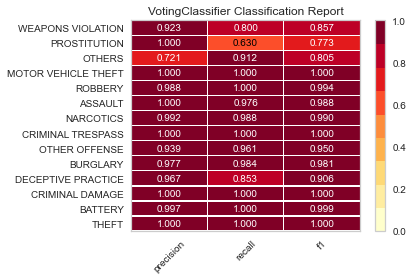

In [34]:
# Relatório de Classificação
target_names = Classes
visualizer = ClassificationReport(eclf1, classes=target_names)
visualizer.fit(X=x1, y=x2)     
visualizer.score(y1, y2)      

print('================= Relatório de Classificação =================')
print('')
print(classification_report(y2, result, target_names=target_names))

g = visualizer.poof()            

# Fim